In [1]:
#run at start of notebook, with fresh kernel
import os
default_path = os.getcwd()
print(default_path)

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis


# NBody Analysis

In [2]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingNBody" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]

r_s = []
num_s = []
z_rms_s = []
v_rms_s = []
params = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, z_rms, v_rms, popt = Analysis.analysis(folder,type='Periodic')
    
    r_s.append(r)
    num_s.append(Num_stars)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)
    params.append(popt)

    print(os.getcwd()) 


/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingNBody
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingNBody/500ParticlesOnly_Snapshots


ValueError: not enough values to unpack (expected 8, got 7)

In [ ]:
Analysis.pars_track(params,num_s)

In [ ]:
import numpy as np

p0 = []
p1 = []
p2 = []
p3 = []
for p in params:
    if len(p) >= 1: 
        p0.append(p[0])
        if len(p)>= 2:
            p1.append(p[1])
            if len(p)>= 3:
                p2.append(p[2])
                if len(p)>= 4:
                    p3.append(p[3])
                else:
                    p3.append(None)
            else:
                p2.append(None)
        else:
            p1.append(None)
    else:
        p0.append(None)

array1 = [[n,p] for n,p in zip(num_s,p0)]
array2 = [[n,p] for n,p in zip(num_s,p1)]
array3 = [[n,p] for n,p in zip(num_s,p2)]
array4 = [[n,p] for n,p in zip(num_s,p3)]
array1.sort()
array2.sort()
array3.sort()
array4.sort()
array1 = np.array(array1)
array2 = np.array(array2)
array3 = np.array(array3)
array4 = np.array(array4)

print(array1)
print(array2)
print(array3)
print(array4)

fig,ax = plt.subplots(1,4, figsize = (15,5))

ax[0].plot(array1[1:,0],array1[1:,1],"o--",color = "red")
ax[0].set_title("$a_0$")
ax[1].plot(array2[1:,0],array2[1:,1],"o--",color = "blue")
ax[1].set_title("$a_1$")
ax[2].plot(array3[1:,0],array3[1:,1],"o--",color = "green")
ax[2].set_title("$a_2$")
ax[3].plot(array4[1:,0],array4[1:,1],"o--",color = "orange")
ax[3].set_title("$a_3$")

plt.show()


In [ ]:
import numpy as np

array1 = [[n,z] for n,z in zip(num_s,z_rms_s)]
array2 = [[n,v] for n,v in zip(num_s,v_rms_s)]
array1.sort()
array2.sort()

array1 = np.array(array1)
array2 = np.array(array2)
print(array1)
print(array2)

fig,ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(array1[:,0],array1[:,1],"o--")
ax[0].set_ylabel("$z_{rms}$")
ax[0].set_xlabel("Number of Particles")

ax[1].plot(array2[:,0],array2[:,1],"o--")
ax[1].set_ylabel("$v_{rms}$")
ax[1].set_xlabel("Number of Particles")
plt.show()

# FDM Analysis

In [ ]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingFDM" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]

r_s = []
FDM_z_rms_s = []
FDM_v_rms_s = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, FDM_z_rms, FDM_v_rms = Analysis.analysis(folder,type='Periodic')
    
    r_s.append(r)
    FDM_z_rms_s.append(FDM_z_rms)
    FDM_v_rms_s.append(FDM_v_rms)

    print(os.getcwd()) 


In [ ]:
import numpy as np

array1 = [[r,z] for r,z in zip(r_s,FDM_z_rms_s)]
array2 = [[r,v] for r,v in zip(r_s,FDM_v_rms_s)]
array1.sort()
array2.sort()

array1 = np.array(array1)
array2 = np.array(array2)
print(array1)
print(array2)

fig, ax = plt.subplots(1,2, figsize = (12,5))
ax[0].plot(array1[:,0],array1[:,1],"o--")
ax[0].set_ylabel("$z_{rms}$")
ax[0].set_xlabel("Fuzziness $r$")

ax[1].plot(array2[:,0],array2[:,1],"o--")
ax[1].set_ylabel("$v_{rms}$")
ax[1].set_xlabel("Fuzziness $r$")
plt.show()

# 50/50 FDM/NBody Analysis

In [ ]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingFull" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
#folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
folders  = ["FDM0.5_r0.014584958984941289_Snapshots","FDM0.5_r0.007292479492470644_Snapshots","FDM0.5_r0.003646239746235322_Snapshots","FDM0.5_r0.0007292479492470644_Snapshots"]
r_s = []
FDM_z_rms_s = []
FDM_v_rms_s = []
z_rms_s = []
v_rms_s = []
params = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, FDM_z_rms, FDM_v_rms, z_rms, v_rms, popt = Analysis.analysis(folder)
    
    r_s.append(r)
    FDM_z_rms_s.append(FDM_z_rms)
    FDM_v_rms_s.append(FDM_v_rms)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)
    params.append(popt)

    print(os.getcwd()) 

In [ ]:
Analysis.pars_track(params,r_s)

In [ ]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingFull" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]

r_s = []
FDM_z_rms_s = []
FDM_v_rms_s = []
z_rms_s = []
v_rms_s = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, FDM_z_rms, FDM_v_rms, z_rms, v_rms = Analysis.analysis(folder,type='Periodic')
    
    r_s.append(r)
    FDM_z_rms_s.append(FDM_z_rms)
    FDM_v_rms_s.append(FDM_v_rms)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)

    print(os.getcwd()) 

In [ ]:
import numpy as np

print("------------------------")
print("FDM")
array1 = [[r,z] for r,z in zip(r_s,FDM_z_rms_s)]
array2 = [[r,v] for r,v in zip(r_s,FDM_v_rms_s)]
array1.sort()
array2.sort()

array1 = np.array(array1)
array2 = np.array(array2)
print(array1)
print(array2)

fig, ax = plt.subplots(1,2, figsize = (12,5))
ax[0].plot(array1[:,0],array1[:,1],"o--")
ax[0].set_ylabel("$z_{rms}$")
ax[0].set_xlabel("Fuzziness $r$")
ax[0].set_ylim(0,1)

ax[1].plot(array2[:,0],array2[:,1],"o--")
ax[1].set_ylabel("$v_{rms}$")
ax[1].set_xlabel("Fuzziness $r$")
ax[1].set_ylim(0,2)
plt.show()

print("---------------------")
print("PARTICLES")
array1 = [[r,z] for r,z in zip(r_s,z_rms_s)]
array2 = [[r,v] for r,v in zip(r_s,v_rms_s)]
array1.sort()
array2.sort()

array1 = np.array(array1)
array2 = np.array(array2)
print(array1)
print(array2)

fig, ax = plt.subplots(1,2, figsize = (12,5))
ax[0].plot(array1[:,0],array1[:,1],"o--")
ax[0].set_ylabel("$z_{rms}$")
ax[0].set_xlabel("Fuzziness $r$")
ax[0].set_ylim(0,1)

ax[1].plot(array2[:,0],array2[:,1],"o--")
ax[1].set_ylabel("$v_{rms}$")
ax[1].set_xlabel("Fuzziness $r$")
ax[1].set_ylim(0,2)
plt.show()




# Isolated N-Body Analysis

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/NBody
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/NBody/50000ParticlesOnly_Snapshots
r=0.5,Num_stars = 50000.0


/home/boris/Documents/Research/FDM_n_Bodies/OneD/FDM.py:125: RuntimeWarning: invalid value encountered in true_divide
  F_s = F_s/Norm_const


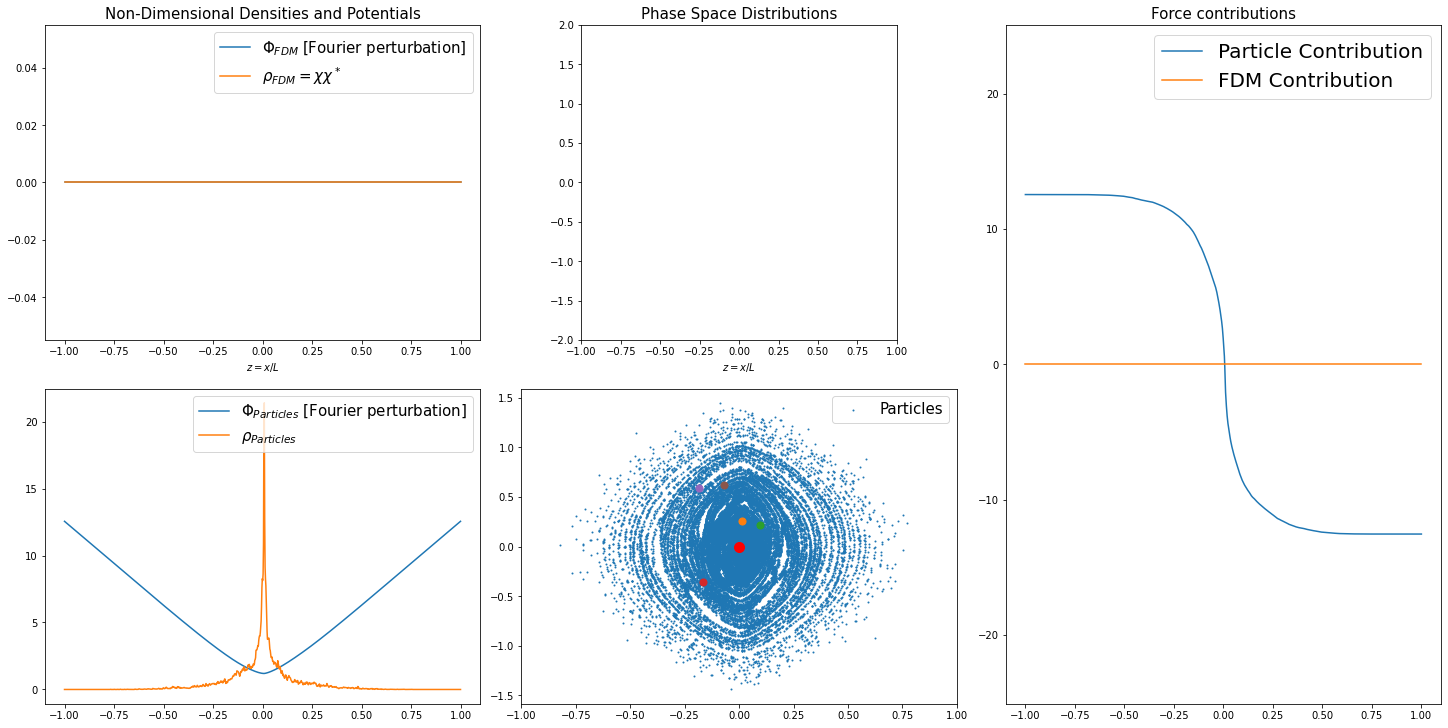

v_rms = 0.33957010439170304
z_rms = 0.1505654877599323
K_avg = 0.5*m*v_rms^2 = 1.153078557965921e-06 (m=2e-05)
=> 2*K_avg = 2.306157115931842e-06
W_avg = 7528.274387996616
---------Now Different Routine---------
K_tot = 0.05765392789829624
K_avg = 1.1530785579659247e-06
W_tot = -1.1972709730124171
W_avg = -2.3945419460248343e-05


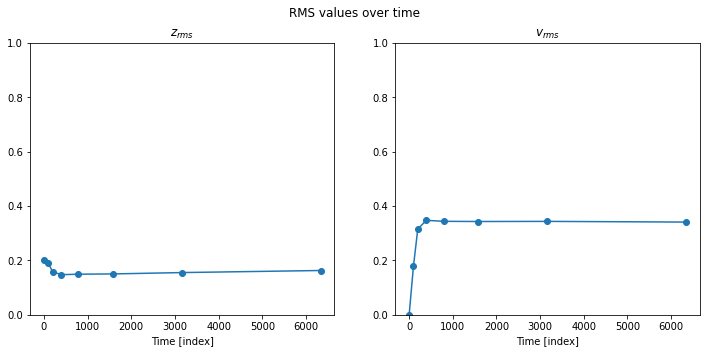

/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/NBody.py:108: RuntimeWarning: invalid value encountered in true_divide
  v_rms_array = bins/bins_counts


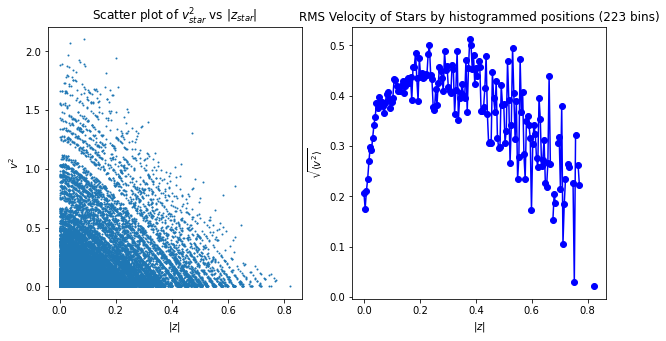

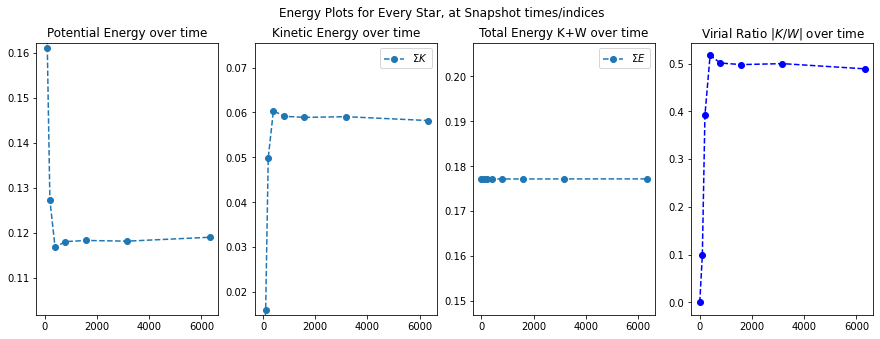

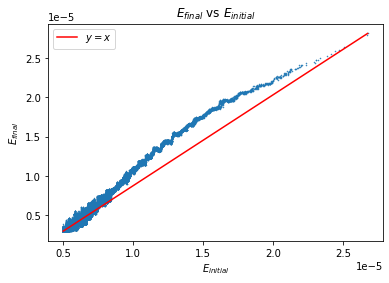

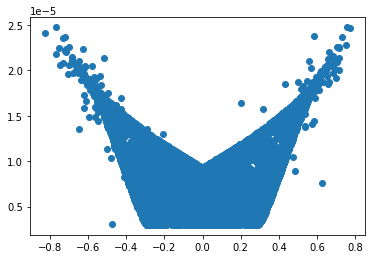

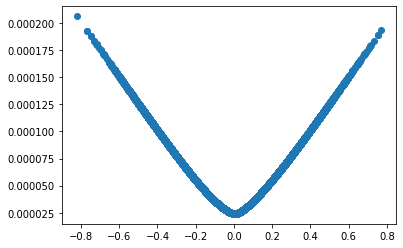

Total Potential: 1.911785336775387
Total Potential: -0.955892668387715
223


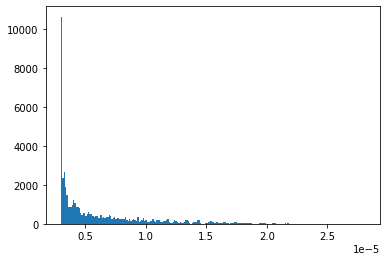

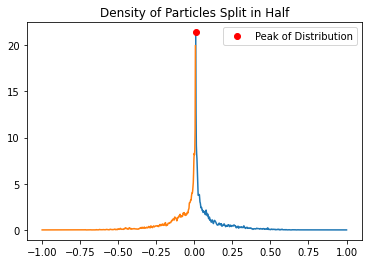

/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/NBody.py:291: RuntimeWarning: divide by zero encountered in log
  ax[1].plot(np.log(z_whole),np.log(rho_whole))


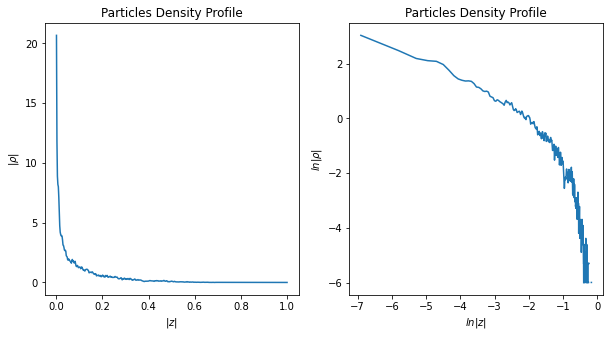

Check
Check
Check
#columns = 3
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


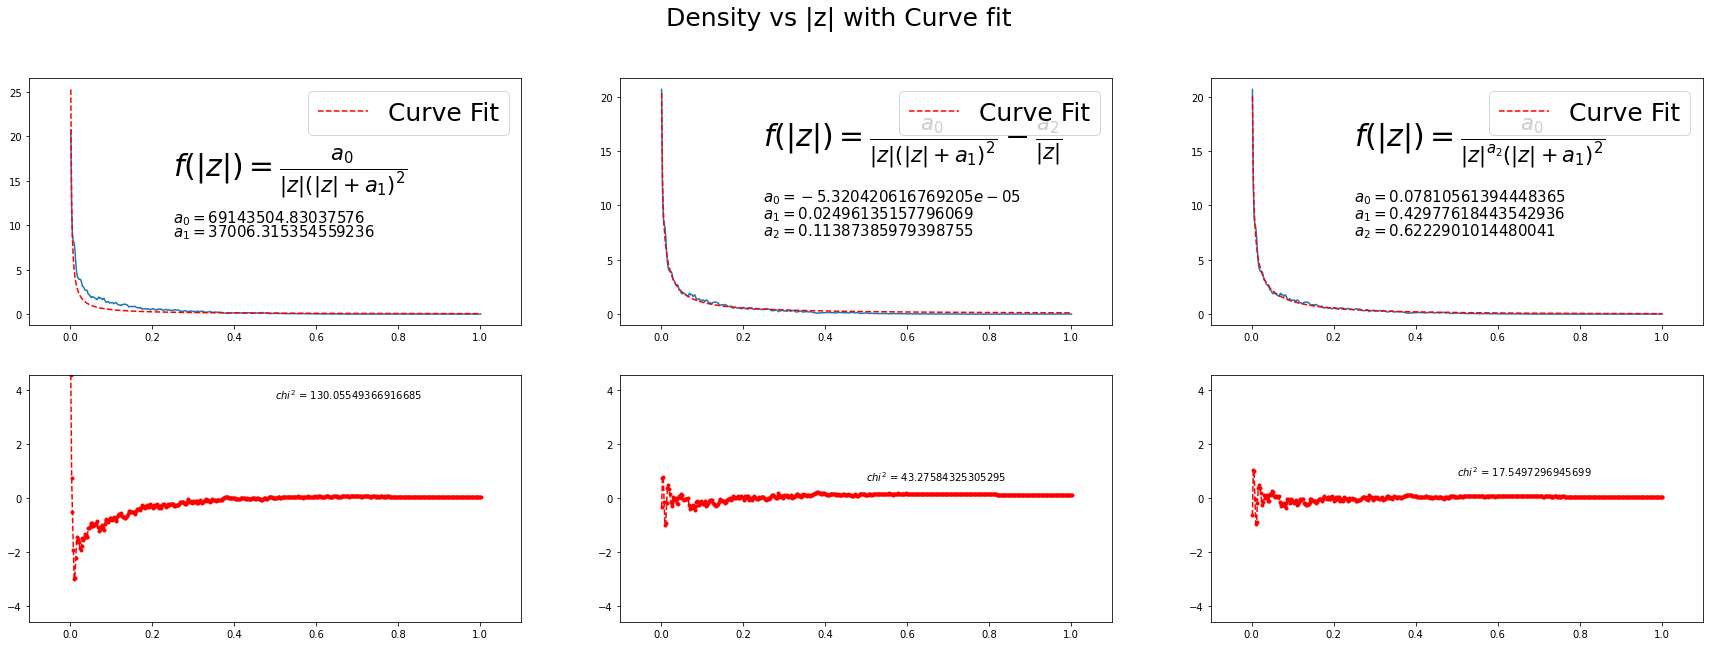

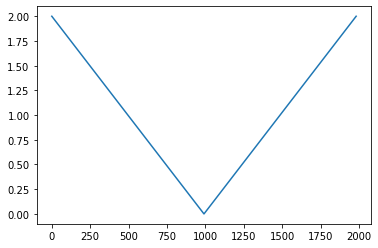

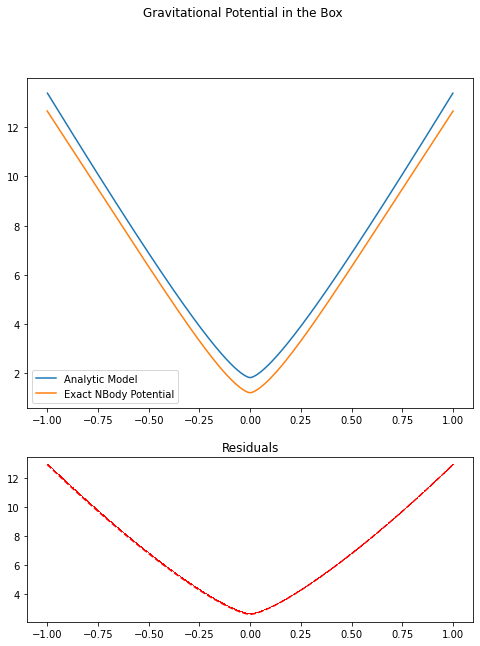

fit params = [0.07810561 0.42977618 0.6222901 ]
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/NBody/50000ParticlesOnly_Snapshots


In [3]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingIsolated/NBody" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
#folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
#folders  = ["5ParticlesOnly_Snapshots","1000ParticlesOnly_Snapshots","10000ParticlesOnly_Snapshots","50000ParticlesOnly_Snapshots","100000ParticlesOnly_Snapshots"]
folders = ["50000ParticlesOnly_Snapshots"]
r_s = []
z_rms_s = []
v_rms_s = []
params = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, z_rms, v_rms, popt = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)
    params.append(popt)

    print(os.getcwd()) 

#### Equilibrium ICs

In [3]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingEquilibriumICs/NBody" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
#folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
#folders  = ["5ParticlesOnly_Snapshots","1000ParticlesOnly_Snapshots","10000ParticlesOnly_Snapshots","50000ParticlesOnly_Snapshots","100000ParticlesOnly_Snapshots"]
folders = ["10000ParticlesOnly_Snapshots",
"50000ParticlesOnly_Snapshots"]
r_s = []
z_rms_s = []
v_rms_s = []
params = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, z_rms, v_rms, popt = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)
    params.append(popt)

    print(os.getcwd()) 

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/NBody
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/NBody/10000ParticlesOnly_Snapshots
[['Time Elapsed:' '308.0600130558014']
 ['Box Length:' '2.0']
 ['Boson Mass:' '1']
 ['Number of bosons:' '0.0']
 ['Particle mass:' '2.8979109870790686e-05']
 ['Number of Particles:' '10000']
 ['FDM Fuzziness:' '0.5']
 ['Grid Points:' '1000']]


ValueError: not enough values to unpack (expected 6, got 2)

#### Mass Segregation / Variable Mass

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingMassSegregation
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingMassSegregation/50000ParticlesOnly_Snapshots
[['Time Elapsed:' '4361.921041965485']
 ['Box Length:' '2.0']
 ['Boson Mass:' '1']
 ['Number of bosons:' '0.0']
 ['Particle mass(es):' '2e-05']
 ['Variable mass:' 'True']
 ['Variable mass fraction' '0.01']
 ['sigma1' '0.001']
 ['sigma2' '1.0101010101010101e-05']
 ['Number of Particles:' '50000']
 ['FDM Fuzziness:' '0.5']
 ['Grid Points:' '1000']]
r=0.5,Num_stars = 50000.0


/home/boris/Documents/Research/FDM_n_Bodies/OneD/FDM.py:125: RuntimeWarning: invalid value encountered in true_divide
  F_s = F_s/Norm_const


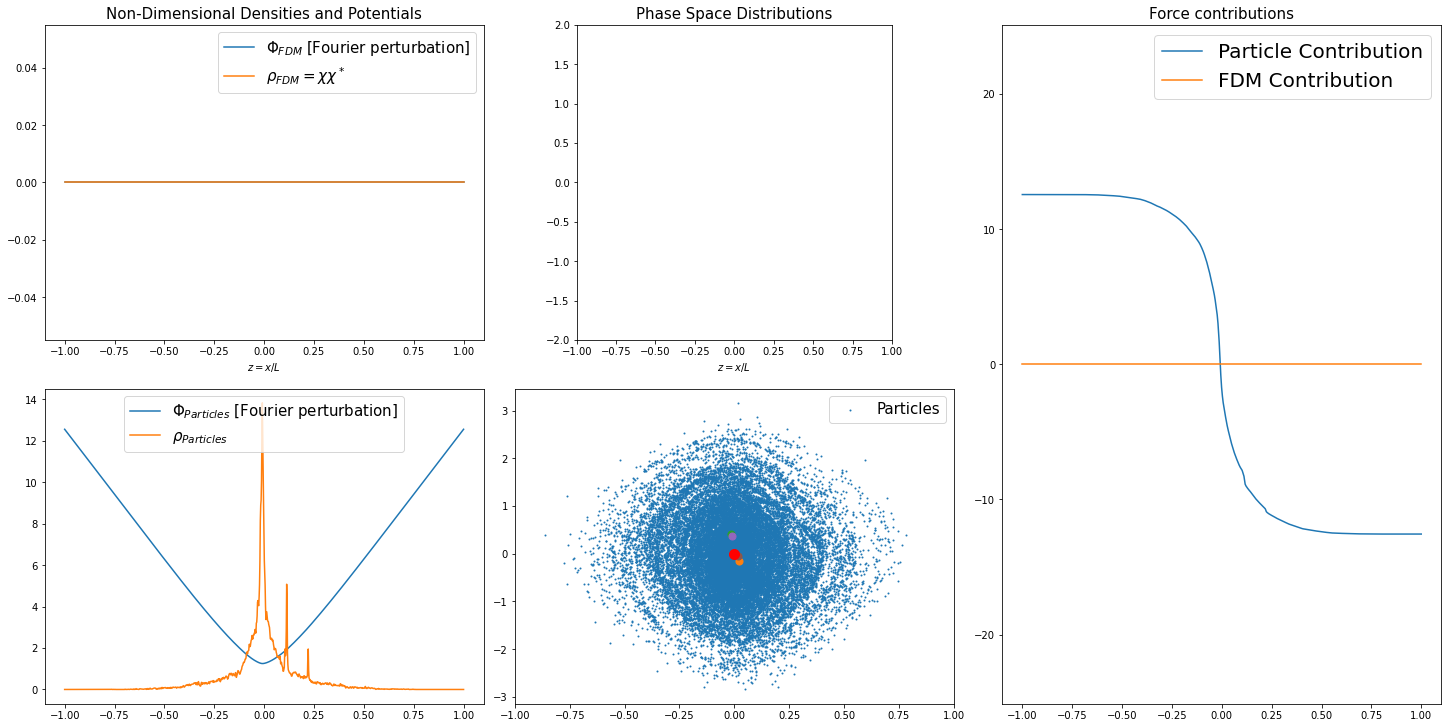

7
v_rms = 0.69075819465294
z_rms = 0.15418634605378279
K_avg = 0.5*m*v_rms^2 = 4.77146883480189e-06 (m=2e-05)
=> 2*K_avg = 9.54293766960378e-06
W_avg = 7709.317302689139
---------Now Different Routine---------
K_tot = 0.23857344174009515
K_avg = 4.771468834801903e-06
W_tot = -1.254567295118513
W_avg = -2.5091345902370258e-05


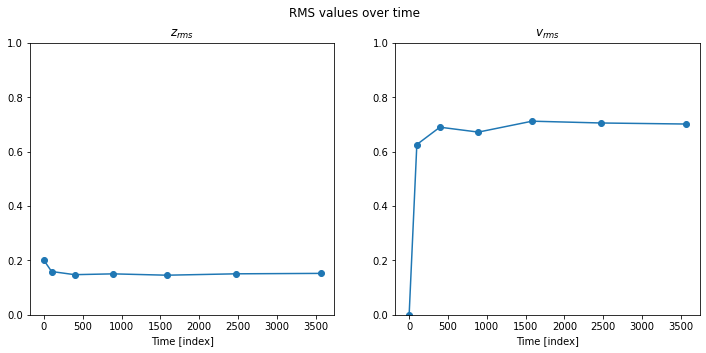

/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/NBody.py:108: RuntimeWarning: invalid value encountered in true_divide
  v_rms_array = bins/bins_counts


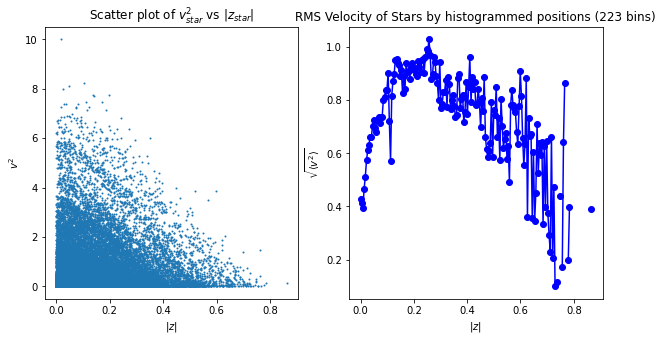

['True', 0.01, 0.001, 1.0101010101010101e-05]
True
50000
500


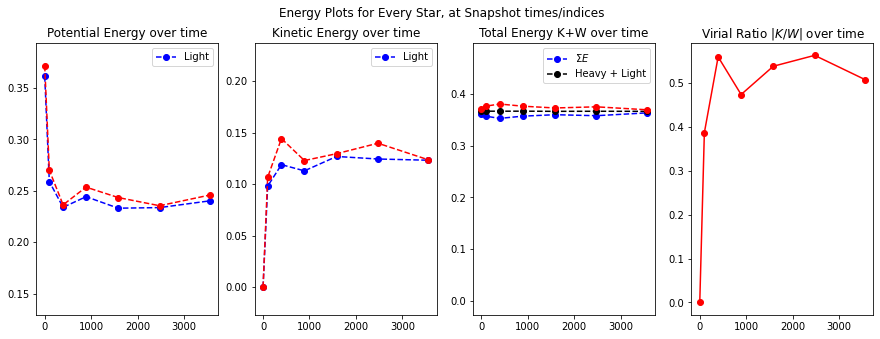

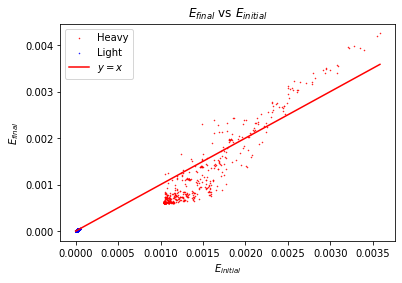

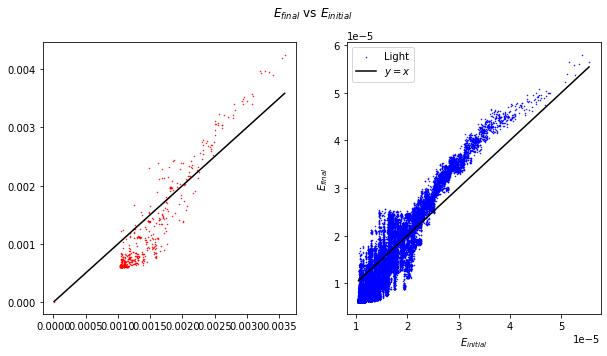

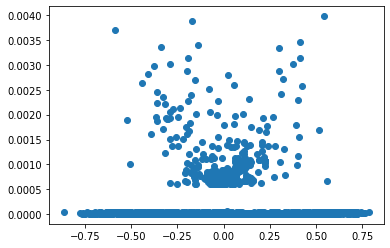

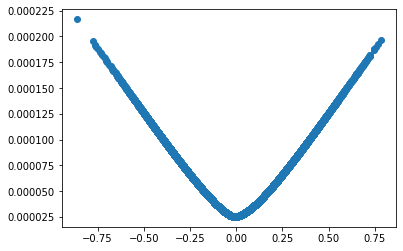

Total Potential: 1.979788591264563
Total Potential: -0.9898942956323031
223


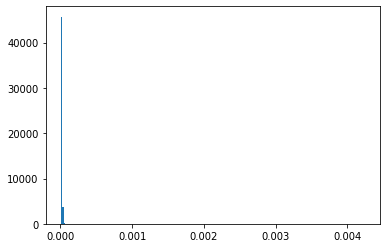

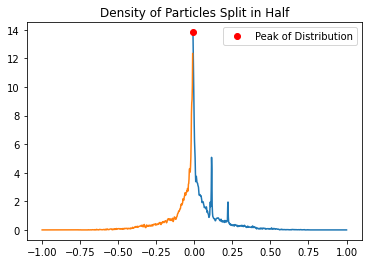

/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/NBody.py:324: RuntimeWarning: divide by zero encountered in log
  ax[1].plot(np.log(z_whole),np.log(rho_whole))


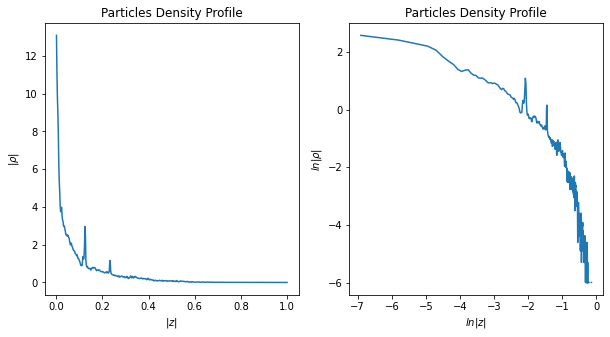

Check
Check
Check
Check
#columns = 4
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


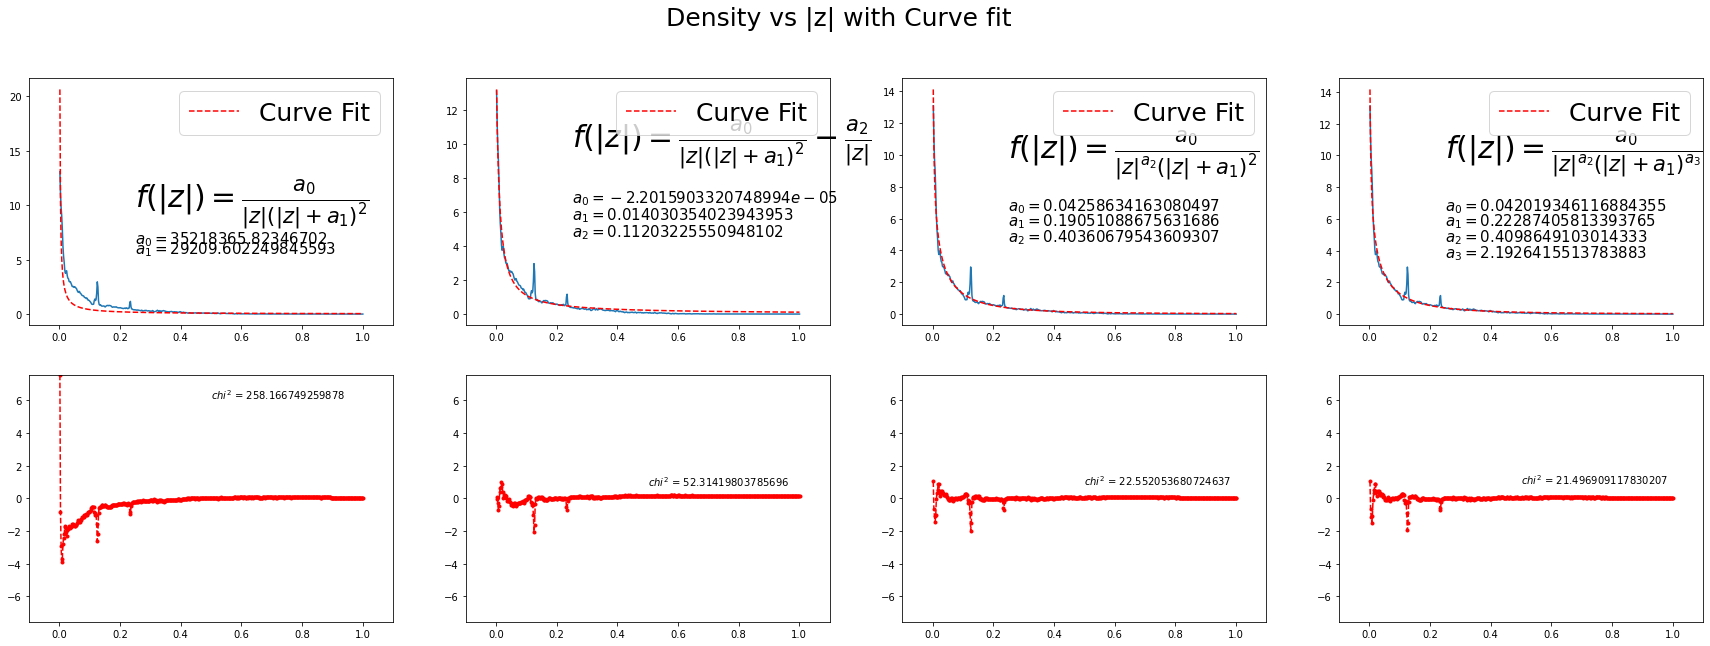

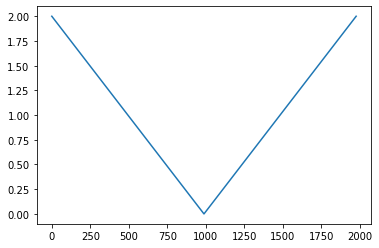

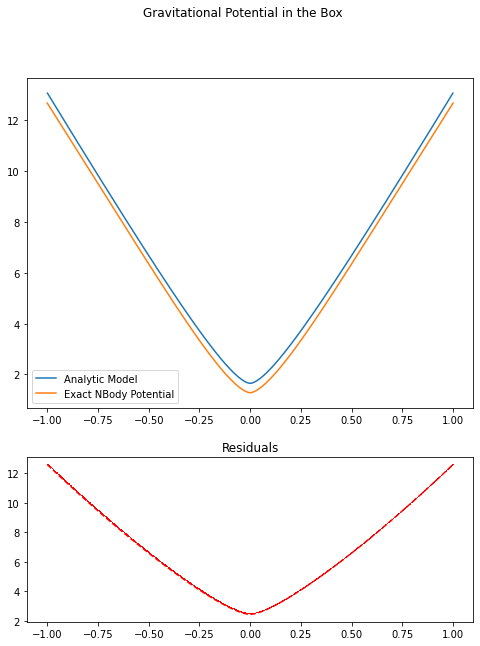

fit params = [0.04201935 0.22287406 0.40986491 2.19264155]
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingMassSegregation/50000ParticlesOnly_Snapshots


In [2]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingMassSegregation" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
#folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
#folders  = ["5ParticlesOnly_Snapshots","1000ParticlesOnly_Snapshots","10000ParticlesOnly_Snapshots","50000ParticlesOnly_Snapshots","100000ParticlesOnly_Snapshots"]
#folders = ["10000ParticlesOnly_Snapshots","50000ParticlesOnly_Snapshots"]
folders = ["50000ParticlesOnly_Snapshots"]


r_s = []
z_rms_s = []
v_rms_s = []
params = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, z_rms, v_rms, popt = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)
    params.append(popt)

    print(os.getcwd()) 

## Isolated FDM

In [ ]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingIsolated/FDM" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
# folders  = ["OnlyFDM_r0.014584958984941289_Snapshots",
#             "OnlyFDM_r0.007292479492470644_Snapshots",
#             "OnlyFDM_r0.0007292479492470644_Snapshots"]
r_s = []
z_rms_s = []
v_rms_s = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_bosons, z_rms, v_rms = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)

    print(os.getcwd()) 

## Isolated Full

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/Full
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/Full/FDM0.5_r0.008157645763118187_Snapshots
[['Time Elapsed:' '3514.189070701599']
 ['Box Length:' '2.0']
 ['Boson Mass:' '61.29219317913598']
 ['Number of bosons:' '0.008157645763118187']
 ['Particle mass(es):' '1e-05']
 ['Variable mass:' 'False']
 ['Variable mass fraction' '0']
 ['sigma1' '1e-05']
 ['sigma2' '0']
 ['Number of Particles:' '50000']
 ['FDM Fuzziness:' '0.008157645763118187']
 ['Grid Points:' '1000']]
r=0.008157645763118187,Num_stars = 50000.0


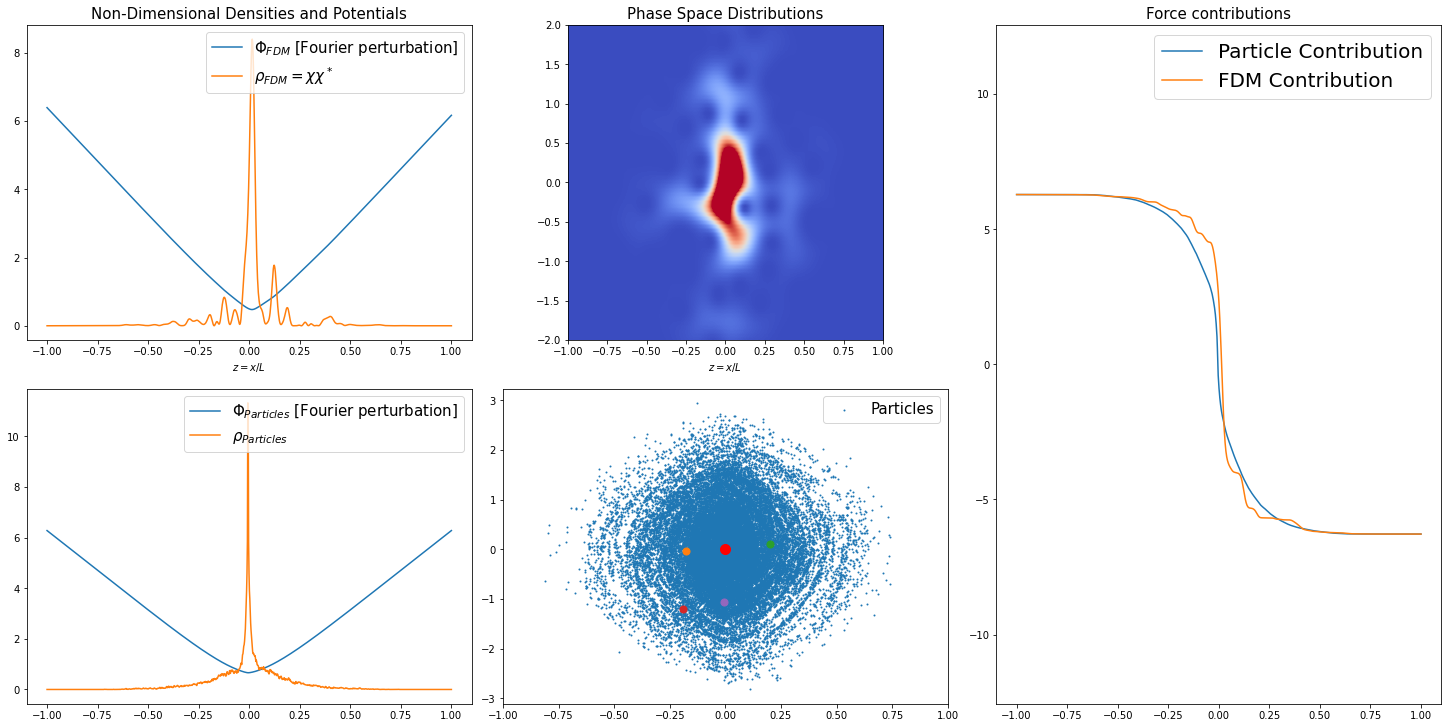

7
sum chi^2 = 4074.7417827520558
500000.0
0.008157641206710637


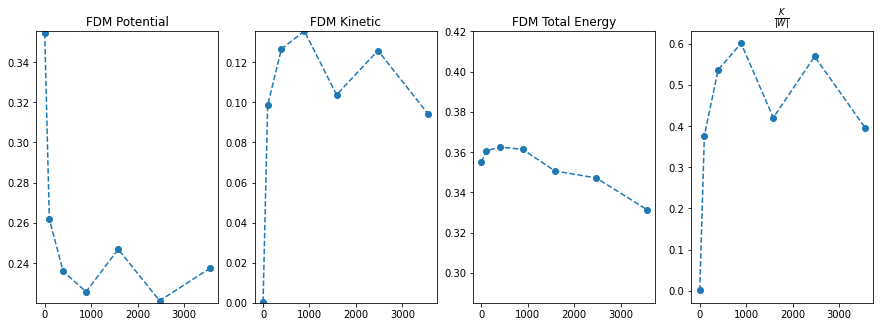

1.0000000000000002


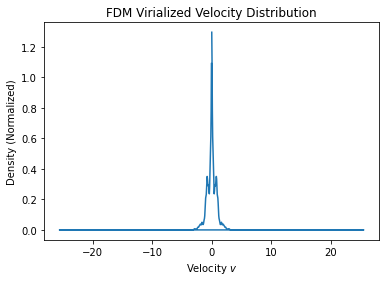

0.017901260166089374


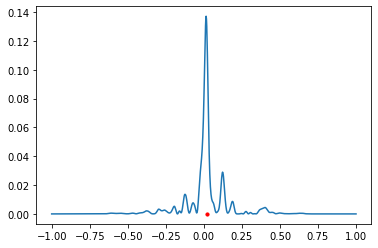

z_rms = 0.0810300115046495
v_rms = 0.10816288670350566
v_rms = 0.7386003658724424
z_rms = 0.16092898268792702
K_avg = 0.5*m*v_rms^2 = 2.727652502334529e-06 (m=1e-05)
=> 2*K_avg = 5.455305004669058e-06
W_avg = 8046.449134396351
---------Now Different Routine---------
K_tot = 0.13638262511672608
K_avg = 2.7276525023345217e-06
W_tot = -0.330419181791896
W_avg = -6.60838363583792e-06


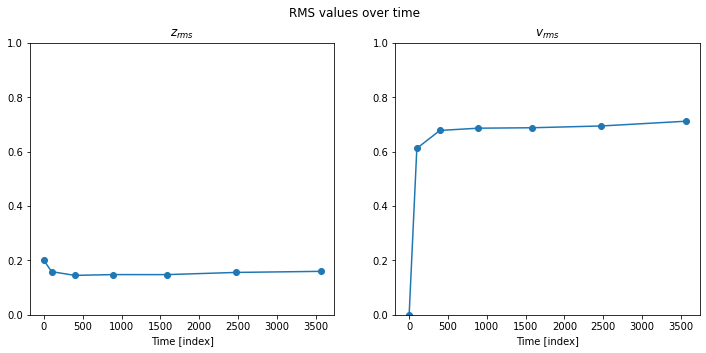

/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/NBody.py:108: RuntimeWarning: invalid value encountered in true_divide
  v_rms_array = bins/bins_counts


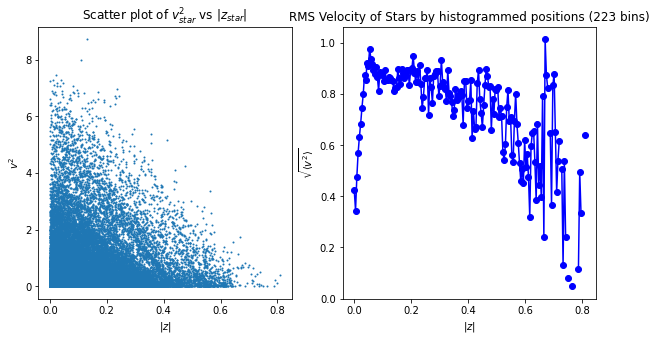

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['False', 0.0, 1e-05, 0.0]


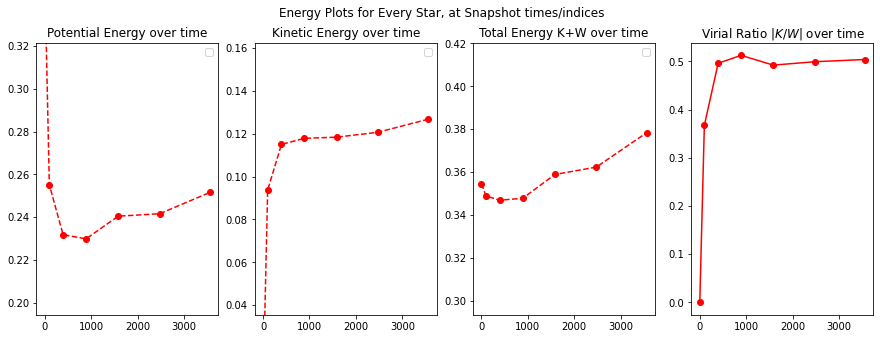

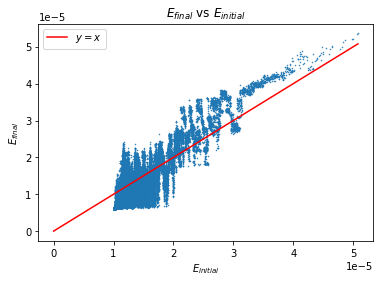

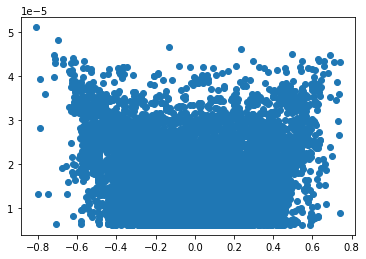

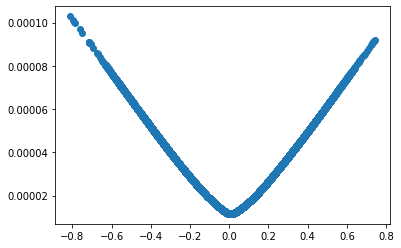

Total Potential: 0.5239189106081199
Total Potential: -0.2619594553040656
223


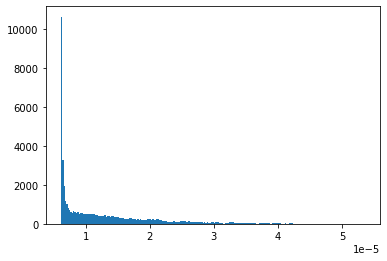

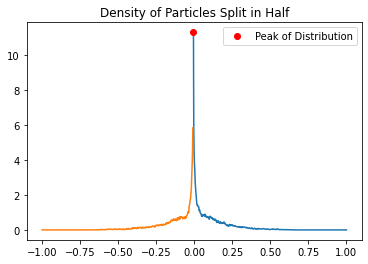

/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/NBody.py:324: RuntimeWarning: divide by zero encountered in log
  ax[1].plot(np.log(z_whole),np.log(rho_whole))


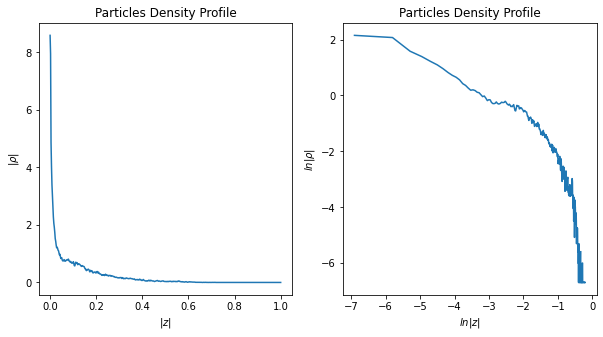

Check
Check
Check
#columns = 3
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


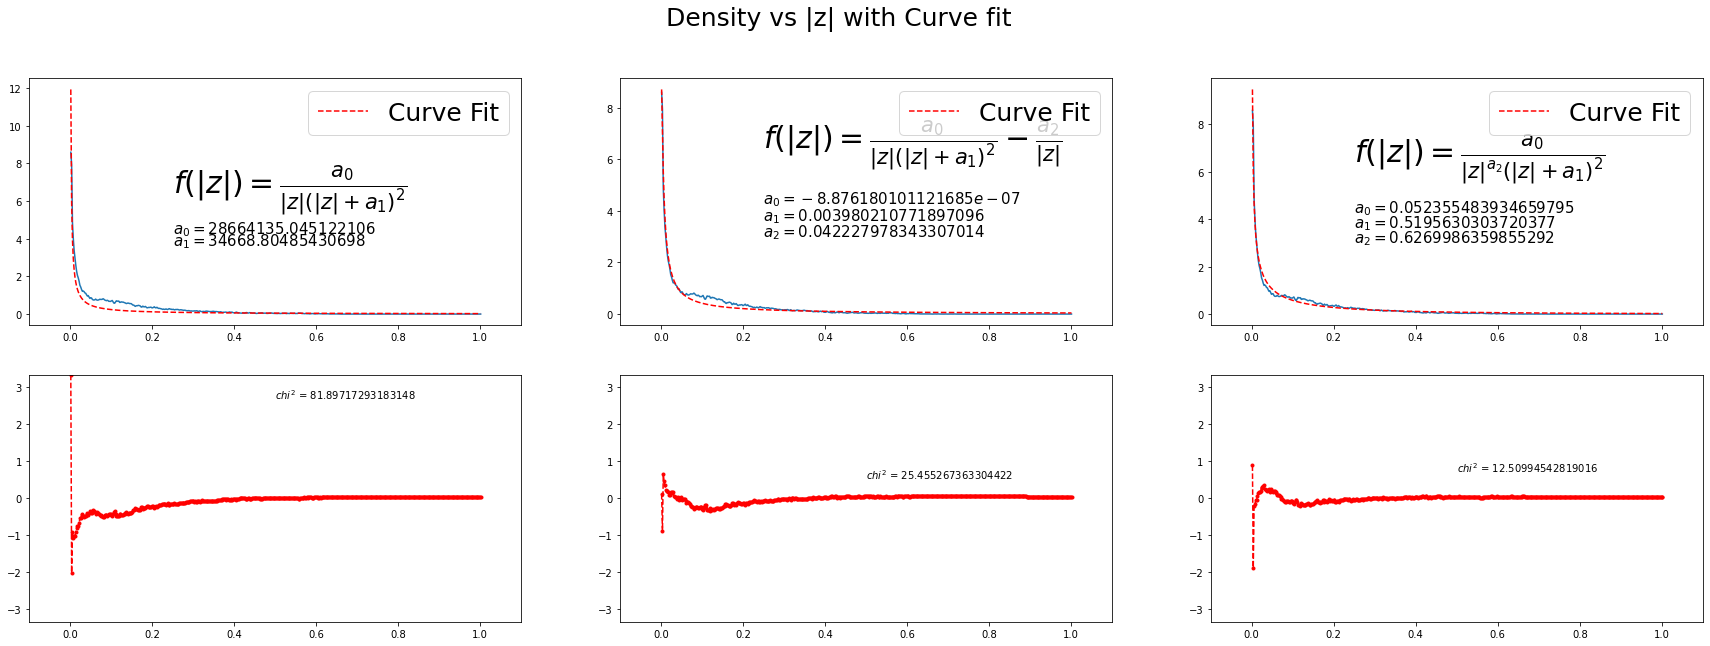

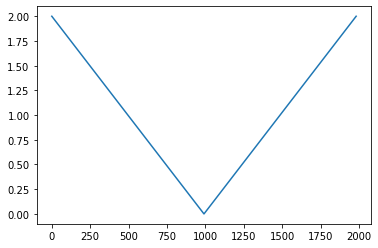

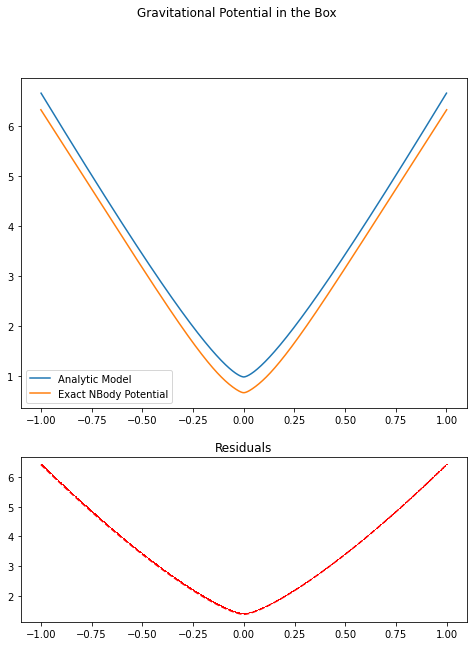

fit params = [0.05235548 0.51956303 0.62699864]


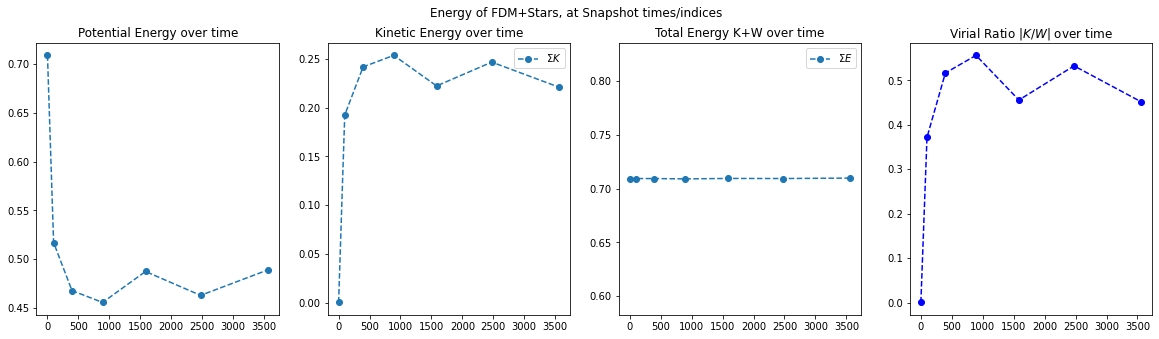

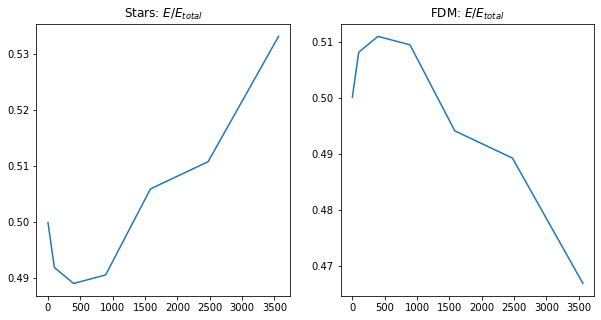

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/Full/FDM0.5_r0.008157645763118187_Snapshots


In [2]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingIsolated/Full" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
#folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
folders = ["FDM0.5_r0.008157645763118187_Snapshots"]
    # "FDM0.5_r0.004078822881559093_Snapshots",
    #         "FDM0.5_r0.0008157645763118187_Snapshots",
    #         "FDM0.5_r0.0004078822881559093_Snapshots"]

r_s = []
FDM_z_rms_s = []
FDM_v_rms_s = []
z_rms_s = []
v_rms_s = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, FDM_z_rms, FDM_v_rms, z_rms,v_rms, popt = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    FDM_z_rms_s.append(FDM_z_rms)
    FDM_v_rms_s.append(FDM_v_rms)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)

    print(os.getcwd()) 

# Calculate $v_{rms}$ and $R_{syst}$ 

Want to verify
$$\langle v^2 \rangle = \frac{GM}{R_{syst}}$$

In [ ]:
v_rms = np.sqrt(np.mean([star.v**2 for star in stars]))
z_rms = np.sqrt(np.mean([star.x**2 for star in stars]))
print(f"v_rms = {v_rms}")
print(z_rms)
#v_rms = np.sqrt(np.sum([star.v**2 for star in stars])/Num_stars)

K = 0.5 * v_rms**2
print(f"K_avg = 0.5*m*v_rms^2 = {K} (m=1)")
print(F"=> 2*K_avg = {2*K}")

print(z_rms*Num_stars)

print("-----------------------")




R_syst = Num_stars / v_rms**2
print(R_syst)



rho_0 = np.mean(rho_part)
print(4*rho_0*z_rms)

print(v_rms**2 / (2*np.pi*z_rms))

print(16*np.pi*rho_0**2*z_rms**3 / Num_stars)


In [ ]:
plt.plot(z,phi_part)
plt.plot(z,-Num_stars/np.abs(z))
plt.ylim(5*np.min(phi_part),-np.min(phi_part))

In [ ]:

phi_part = phi_part - (np.max(phi_part)-np.max(-Num_stars/np.abs(z)))

plt.plot(z,phi_part)
plt.plot(z,-Num_stars/np.abs(z))
plt.ylim(5*np.min(phi_part),-np.min(phi_part))
plt.show()

# Compute total KE of stars:
K = 0
for star in stars:
    dK = 0.5*star.v**2
    K += dK
print(K)
#average KE:
print(K/Num_stars)

#Compute Total Potential
W = 0
for star in stars:
    #g = NB.g(star,a_part,dz)
    i = int(star.x//dz)
    rem = star.x % dz 

    if i != len(phi_part)-1:
        value = phi_part[i] + rem*(phi_part[i+1]-phi_part[i])/dz
    elif i == len(phi_part)-1:
        # then i+1 <=> 0
        value = phi_part[i] + rem*(phi_part[0]-phi_part[i])/dz
    
    phi_star = value
    dW = phi_star
    W += dW
print(W)
#average W:
print(W/Num_stars)

In [ ]:
def f(z,*p):
    u_0 = p[0]
    z_0 = p[1]
    return u_0 / np.cosh(0.5*z/z_0)**2

guess = [rho_0,z_0]
popt,pcov = opt.curve_fit(f,z,grid_counts,p0 = guess)
plt.plot(z,grid_counts)
plt.plot(z,f(z,*popt))
plt.show()

guess = [rho_0,z_0]
popt,pcov = opt.curve_fit(f,z,phi_part,p0 = guess)
plt.plot(z,phi_part)
plt.plot(z,f(z,*popt))
plt.show()

def g(z,*p):
    return p[0]*np.exp(-z**2 / p[1])

guess = [-rho_0,z_0]
popt,pcov = opt.curve_fit(g,z,phi_part,p0 = guess)
plt.plot(z,phi_part)
plt.plot(z,g(z,*popt))
plt.show()

